# Predicting heart disease using machine learning.

This notebook is practice for classification projects. In particular, this notebook predicts whether a patient has had a stroke or not.

We're going to take the following approach:

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they've had a stroke?

## Data

From a confidential source. Located on Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset


## Evaluation

> We want to pursue this project if the proof of concept gets an initial accuracy of about 95%.

## Features

1. id
    1. unique identifier
2. gender
    1. "Male", "Female" or "Other"
3. age
    1. age of the patient
4. hypertension
    1. 0 if the patient doesn't have hypertension
    2. 1 if the patient has hypertension
5. heart_disease
    1. 0 if the patient doesn't have any heart diseases
    2. 1 if the patient has a heart disease
6. ever_married
    1. "No" or "Yes"
7. work_type
    1. "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type
    1. "Rural" or "Urban"
9. avg_glucose_level
    1. average glucose level in blood
10. bmi
    1. body mass index
11. smoking_status
    1. "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke **(TARGET LABEL)**
    1. 1 if the patient had a stroke
    2. 0 if not

*Note: "Unknown" in **smoking_status** means that the information is unavailable for this patient*

## Preparing the Tools

We're going to use:

1. Pandas
2. Matplotlib
3. NumPy

For data analysis and manipulation.

In [1]:
# import tools


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For non-funky matplotlib plots

%matplotlib inline 

# Import models from Scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Data Stuff

from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Using imbalanced learn pipeline for resampling!
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Model evaluation

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Load Data

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.isna().sum() # Only bmi is missing. Two options: bmi is changed to the mean, or remove the samples because there's so many samples already.

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Data Exploration

The goal here is to find out more about the data and become subject matter expert (or at least novice) on the dataset we're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change, or remove features to get more out of your data?

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
df['stroke'].value_counts()

# Heavily biased towards having no stroke.

# Try the imbalanced-learn module

0    4861
1     249
Name: stroke, dtype: int64

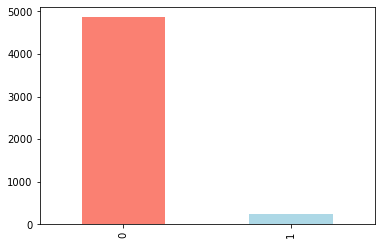

In [7]:
df['stroke'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [8]:
# More info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Stroke Frequency According to Sex

In [10]:
df['gender'].value_counts() # Potentially remove the single Other? Could skew the 'Other' gender in the no stroke prediction.

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
# Compare target column with gender column

pd.crosstab(df['stroke'], df['gender'])

gender,Female,Male,Other
stroke,,,
0,2853,2007,1
1,141,108,0


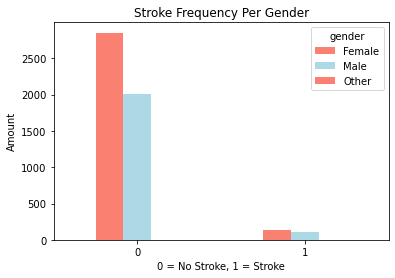

In [12]:
pd.crosstab(df['stroke'], df['gender']).plot(kind='bar', color=['salmon', 'lightblue']);

plt.title("Stroke Frequency Per Gender")
plt.xlabel("0 = No Stroke, 1 = Stroke")
plt.ylabel("Amount")
plt.xticks(rotation=0);

In [13]:
# Let's try it with ever_married

pd.crosstab(df['stroke'], df['ever_married']) # Seven percent of married people had a stroke, Two percent of the rest had none.

ever_married,No,Yes
stroke,,
0,1728,3133
1,29,220


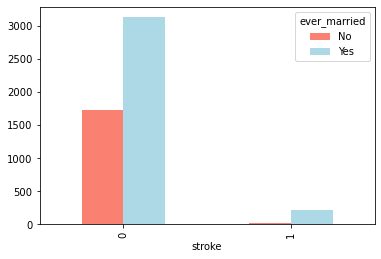

In [14]:
pd.crosstab(df['stroke'], df['ever_married']).plot(kind='bar', color=['salmon', 'lightblue']);

### Age vs. avg_glucose_level for Strokes

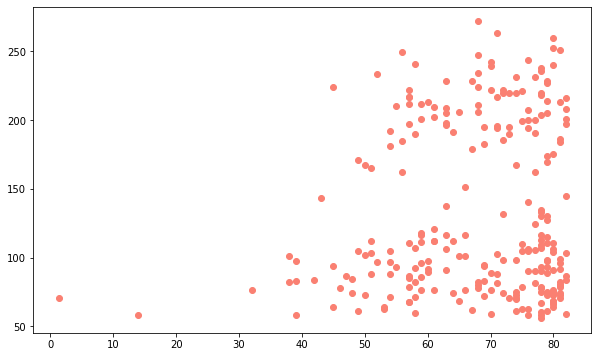

In [15]:
# Create another figure

plt.figure(figsize=(10,6))

# Scatter with Positive Examples

plt.scatter(df.age[df.stroke==1],
            df.avg_glucose_level[df.stroke==1],
            c='salmon');

Generally, the patients who had a stroke begin to  have higher and higher glucose the older they get. Additionally most people begin to have strokes around 40+ age range.

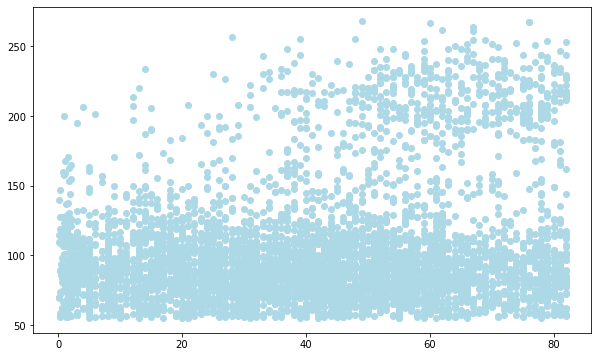

In [16]:
# Create another figure

plt.figure(figsize=(10,6))

# Scatter with Negative Examples

plt.scatter(df.age[df.stroke==0],
            df.avg_glucose_level[df.stroke==0],
            c='lightblue');

Again, there's a trend. But it's difficult to see the difference.

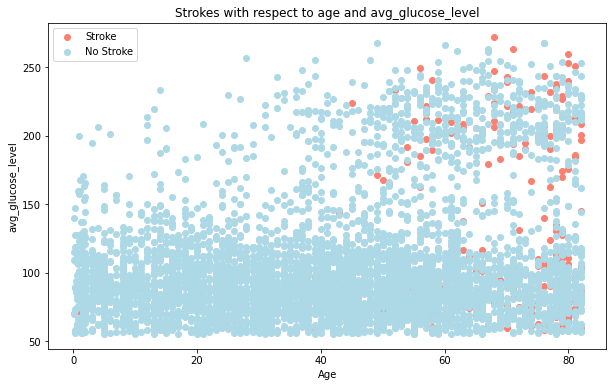

In [17]:
# Combined graphs

plt.figure(figsize=(10,6))

# Scatter with Positive Examples

plt.scatter(df.age[df.stroke==1],
            df.avg_glucose_level[df.stroke==1],
            c='salmon');

plt.scatter(df.age[df.stroke==0],
            df.avg_glucose_level[df.stroke==0],
            c='lightblue');

# Add some helpful info.

plt.title("Strokes with respect to age and avg_glucose_level")
plt.xlabel('Age')
plt.ylabel('avg_glucose_level')
plt.legend(['Stroke', 'No Stroke']);

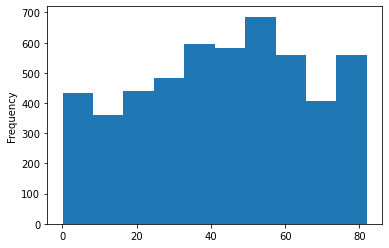

In [18]:
# Check the distribution of the age column with a histogram

df.age.plot.hist(); # Most samples are between 40 and 60.

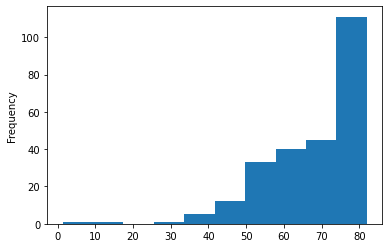

In [19]:
# How about if strokes are positive?

df.age[df.stroke==1].plot.hist(); # Heavy distribution to the right. More risk the older you are.

### Stroke Frequency per work_type

In [20]:
pd.crosstab(df.work_type, df.stroke) # Low children, never_worked has none. Private has the most, but percentage-wise is similar to govt_job. Self-employed has less percentage-wise.

stroke,0,1
work_type,,
Govt_job,624,33
Never_worked,22,0
Private,2776,149
Self-employed,754,65
children,685,2


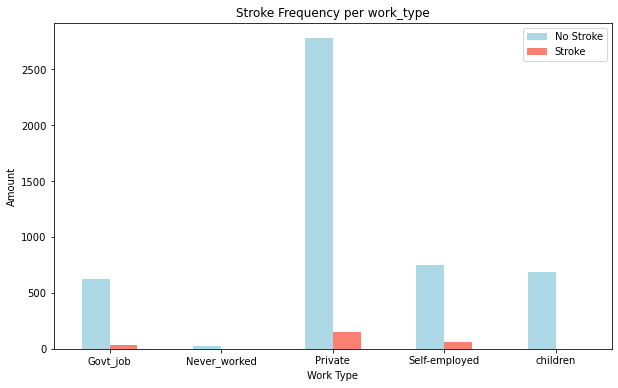

In [21]:
pd.crosstab(df.work_type, df.stroke).plot(kind='bar', figsize=(10, 6), color=['lightblue', 'salmon'])


# More info

plt.title('Stroke Frequency per work_type')
plt.xlabel('Work Type')
plt.ylabel('Amount')
plt.legend(['No Stroke', 'Stroke'])
plt.xticks(rotation=0);

### Let's see Age vs Self-Employed

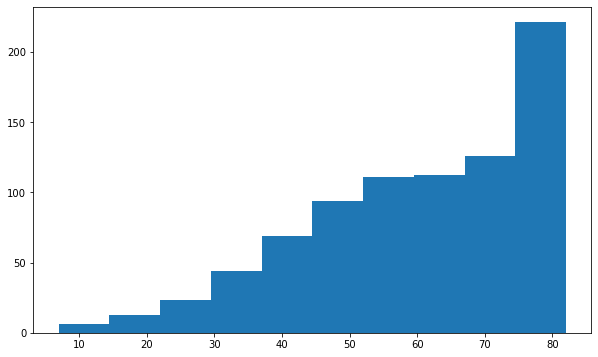

In [22]:
# Create another figure

plt.figure(figsize=(10,6))

# Scatter with Negative Examples

plt.hist(df.age[df.work_type=='Self-employed']); # More people who are older are self-employed. Strange.

### Correlation Matrix Time

In [23]:
# Make a correlation matrix

df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


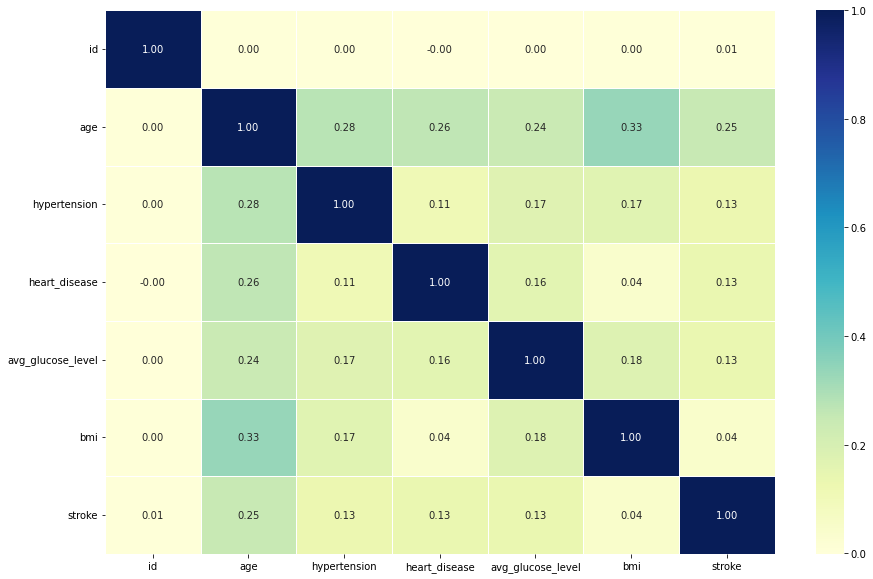

In [24]:
# Let's make our correlation matrix prettier

corr_matrix = df.corr()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(corr_matrix,
                 annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap = 'YlGnBu')

Age seems to be biggest correlating factor here. BMI is especially correlated with Age (minor positive correlation).

In [25]:
# Let me check just how many people are 40 and up.

age_under = df[df.age<40]
print(age_under.shape)
print("Samples with an age above forty: ", df.shape[0] - age_under.shape[0])

(2170, 12)
Samples with an age above forty:  2940


Only a slight difference between the number of above 40s and below 40s, meaning age shouldn't skew that much.

## Modelling

In [26]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
# Split into X & Y

np.random.seed(42)

y = df['stroke']

# Let's drop id from X, because it's honestly irrelevant and harmful to our dataset. Nothing to do with the patient.

X = df.drop(labels=['stroke', 'id'], axis=1)

X = X.reset_index(drop=True)

# Let's solve the imputation right here :)

def toB(element):
            if element == 1:
                return 'True'
            elif element == 0:
                return 'False'
            
X['hypertension'] = X['hypertension'].apply(toB)

X['heart_disease'] = X['heart_disease'].apply(toB)

# Split into training & test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)


X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [28]:
len(y_train[y_train==1]), len(y_test[y_test==1]) # Testing stratification of stroke class. Basic, with imbalance learn.

(199, 50)

It's time to build a machine learning model (plus preprocess the data).

We'll try 3 different machine_learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [29]:
# Create quick pipeline to deal with this stuff.

categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

numerical_features = ['age', 'avg_glucose_level', 'bmi']

In [30]:
[X_train.dtypes==object]

[gender                True
 age                  False
 hypertension          True
 heart_disease         True
 ever_married          True
 work_type             True
 Residence_type        True
 avg_glucose_level    False
 bmi                  False
 smoking_status        True
 dtype: bool]

In [31]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Female,48.0,False,False,Yes,Private,Urban,69.21,33.1,never smoked
1,Male,15.0,False,False,No,Private,Rural,122.25,21.0,never smoked
2,Female,67.0,False,False,Yes,Self-employed,Rural,110.42,24.9,never smoked
3,Male,44.0,False,False,Yes,Private,Urban,65.41,24.8,smokes
4,Male,14.0,False,False,No,Govt_job,Urban,82.34,31.6,Unknown


In [32]:
X_train.dtypes

gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [33]:
X_test['gender'].value_counts()

Female    599
Male      423
Name: gender, dtype: int64

In [34]:
# First, let's deal with the categorical features. I'm going to use a OneHotEncoder to encode them, because the categories don't follow any logical progression.

encoder = OneHotEncoder()

# See: https://stackoverflow.com/questions/62191643/is-there-a-way-to-force-simpleimputer-to-return-a-pandas-dataframe

# Next, let's address the numerical features. There's still some NANs for the bmi, so I'll just be using a imputer to get the mean bmi.

imputer = SimpleImputer()

# Finally, I'm gonna throw it all into a column transformer. Two, so it'll work with the imbalanced learn sampling stuff.

transformer_imp = ColumnTransformer([
    ('num_imputer', imputer,  numerical_features)
    ],
    remainder='passthrough')

transformer_enc =  ColumnTransformer([
    ('cat_encoder', encoder, [3, 4, 5, 6, 7, 8, 9])
    ],
    remainder='passthrough')
# Finally, I'm going to scale all these different features down so it's usuable for the algorithms. Also, I'll be implementing the Pipeline.

#scaler = StandardScaler()

# Also, Imbalanced learn's smotenc

smote_nc = SMOTENC(categorical_features=[3, 4, 5, 6, 7, 8, 9], random_state=42)

# For imblearn, I'm gonna need to convert the 'heart_disease' and 'hypertension' features back into categoricals I will implement this via the followin

from sklearn.base import BaseEstimator, TransformerMixin
'''
class BinaryToBool(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        def toB(element):
            if element == 1:
                return 'True'
            elif element == 0:
                return 'False'
        for row in X:
            #print(row.shape)
            row[2] = toB(row[2])
            row[3] = toB(row[3])
        print(X[0])
        return X
'''

"\nclass BinaryToBool(BaseEstimator, TransformerMixin):\n    \n    def fit(self, X, y=None):\n        return self\n    \n    def transform(self, X, y=None):\n        def toB(element):\n            if element == 1:\n                return 'True'\n            elif element == 0:\n                return 'False'\n        for row in X:\n            #print(row.shape)\n            row[2] = toB(row[2])\n            row[3] = toB(row[3])\n        print(X[0])\n        return X\n"

In [35]:
# Put models in a dictionary

models = {'Logistic Regression' : LogisticRegression(),
          'KNN' : KNeighborsClassifier(),
          'Random Forest' : RandomForestClassifier()}

# Create a function to fit and score models:

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    
    models : a dict of different Scikit-Learn Machine Learning Models
    X_train : Training Data (no labels)
    X_test : Test data (no labels)
    y_train : training labels
    y_test : y_labels
    """
    
    # Set seed
    
    np.random.seed(42)
    
    # Make a dictionary to keep model scores:
    
    model_scores = {}
    
    for name, mod in models.items():
        
        model = Pipeline([
                        ('imputer', transformer_imp),
                        ('sampler', smote_nc),
                        ('encoder', transformer_enc),
                        ('scaler', StandardScaler(with_mean=False)),
                        ('model', mod)
                    ])
        
        # Fit model
        model.fit(X_train, y_train)
        # Evaluate and append to model_scores
        preds = model.predict(X_test)
        model_scores[name] = [accuracy_score(y_test, preds),
            recall_score(y_test, preds),
            precision_score(y_test, preds),
            f1_score(y_test, preds)
        ]
    return model_scores

In [36]:
type(X_train)

pandas.core.frame.DataFrame

In [37]:
scores = fit_and_score(models, X_train, X_test, y_train, y_test)
print(scores) # Accuracy is good, but the actual ability to classify strokes (recall -> No false negatives) is absolutely horrendous.

C:\Users\DarkH\OneDrive\Desktop\Learning Programming OuO\Machine Learning Course\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': [0.7583170254403131, 0.68, 0.12830188679245283, 0.21587301587301588], 'KNN': [0.8062622309197651, 0.3, 0.08426966292134831, 0.13157894736842105], 'Random Forest': [0.8855185909980431, 0.24, 0.13186813186813187, 0.17021276595744683]}


In [38]:
# Debugging

#transformer_imp_X = transformer_imp.fit_transform(X_train)
#transformer_imp_X[0]

### Model Comparison

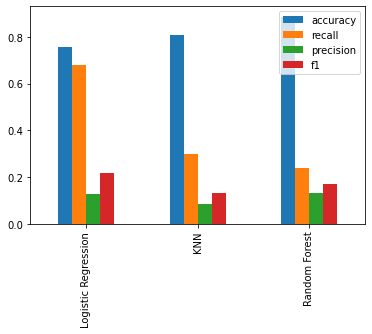

In [39]:
model_compare = pd.DataFrame(scores, index=['accuracy', 'recall', 'precision', 'f1'])
model_compare.T.plot.bar();

So precision's in the garbage for all of them, but it's better to predict a stroke, rather than not and be wrong about the risk of stroke. Accuracy is best on Random Forest, but it's actually not so great because of the low precision and recall scores. Many false negatives might kill people!

So Logistic Regression is actually the best model for the job.

Let's look at the following:
* Hyperparameter Tuning
* Feature Importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area under the Curve (AUC)

#### Hyperparameter Tuning By Hand

In [40]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbours

neighbours = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)

    model = Pipeline([
                        ('imputer', transformer_imp),
                        ('sampler', smote_nc),
                        ('encoder', transformer_enc),
                        ('scaler', StandardScaler(with_mean=False)),
                        ('model', knn)
                    ])
    
    model.fit(X_train, y_train)
    
    train_preds = model.predict(X_train)
    train_scores.append([accuracy_score(y_train, train_preds),
            recall_score(y_train, train_preds),
            precision_score(y_train, train_preds),
            f1_score(y_train, train_preds)
        ])
    
    test_preds = model.predict(X_test)
    test_scores.append([accuracy_score(y_test, test_preds),
            recall_score(y_test, test_preds),
            precision_score(y_test, test_preds),
            f1_score(y_test, test_preds)
        ])
    


In [41]:
train_scores

[[1.0, 1.0, 1.0, 1.0],
 [0.9779843444227005, 0.5477386934673367, 1.0, 0.7077922077922079],
 [0.9072896281800391,
  0.6180904522613065,
  0.2887323943661972,
  0.39360000000000006],
 [0.9148727984344422,
  0.5477386934673367,
  0.2970027247956403,
  0.3851590106007067],
 [0.8688845401174168,
  0.6180904522613065,
  0.2109777015437393,
  0.31457800511508954],
 [0.87720156555773,
  0.5879396984924623,
  0.21787709497206703,
  0.3179347826086957],
 [0.8441780821917808,
  0.6130653266331658,
  0.17888563049853373,
  0.27695800227014755],
 [0.8537181996086106,
  0.6080402010050251,
  0.18876755070202808,
  0.28809523809523807],
 [0.824119373776908,
  0.6231155778894473,
  0.16145833333333334,
  0.2564632885211996],
 [0.8317025440313112,
  0.6030150753768844,
  0.1646090534979424,
  0.2586206896551724],
 [0.8104207436399217,
  0.628140703517588,
  0.1513317191283293,
  0.24390243902439024],
 [0.8184931506849316,
  0.6130653266331658,
  0.15501905972045743,
  0.24746450304259632],
 [0.79476516

In [42]:
test_scores

[[0.8395303326810176, 0.2, 0.07462686567164178, 0.10869565217391304],
 [0.8747553816046967, 0.18, 0.09375, 0.12328767123287672],
 [0.8326810176125244, 0.28, 0.09395973154362416, 0.14070351758793972],
 [0.8483365949119374, 0.26, 0.09923664122137404, 0.143646408839779],
 [0.8062622309197651, 0.3, 0.08426966292134831, 0.13157894736842105],
 [0.8228962818003914, 0.28, 0.0880503144654088, 0.1339712918660287],
 [0.7915851272015656, 0.36, 0.09045226130653267, 0.14457831325301207],
 [0.8052837573385518, 0.34, 0.09289617486338798, 0.14592274678111591],
 [0.7788649706457925, 0.36, 0.08490566037735849, 0.13740458015267173],
 [0.7876712328767124, 0.34, 0.0845771144278607, 0.1354581673306773],
 [0.7690802348336595, 0.4, 0.08849557522123894, 0.14492753623188404],
 [0.7808219178082192, 0.38, 0.08962264150943396, 0.1450381679389313],
 [0.7651663405088063, 0.42, 0.09051724137931035, 0.14893617021276595],
 [0.7759295499021527, 0.38, 0.08755760368663594, 0.14232209737827714],
 [0.7622309197651663, 0.44, 

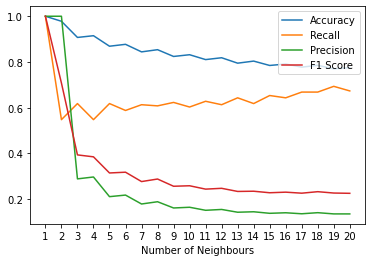

In [43]:
plt.plot(neighbours, train_scores, label="Train Score")
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1 Score'])
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbours");

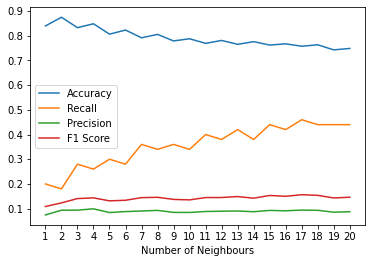

In [44]:
plt.plot(neighbours, test_scores, label="Test Score")
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1 Score'])
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbours");

From the above, in terms of test scores, we can surmise that `n_neighbors=17` produces the best f1_score and the best result overall.

However, it still isn't as good as Logistic Regression, so we'll discard KNN for now.

### Tuning Hyperparameters with `RandomizedSearchCV`

We're going to tune:

* `LogisticRegression()`
* `RandomForestClassifier()`

In [45]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {'model__C' : [0.1, 1, 10, 100],
                'model__solver' : ['liblinear', 'lbfgs'],
                'model__penalty' : ['l1', 'l2']}

# Now for RandomForestClassifier

rf_grid = {'model__n_estimators' : np.arange(10, 500, 50),
           'model__max_depth' : [None, 3, 5, 10],
           'model__min_samples_split' : np.arange(2, 20, 2),
           'model__min_samples_leaf': np.arange(1, 20, 2)}

In [46]:
# Time to use RandomizedSearchCV

# # Tune LogisticRegression

np.random.seed(42)

# Setup





model = Pipeline([
                        ('imputer', transformer_imp),
                        ('sampler', smote_nc),
                        ('encoder', transformer_enc),
                        ('scaler', StandardScaler(with_mean=False)),
                        ('model', LogisticRegression())
                    ])

rs_log_reg = RandomizedSearchCV(model,
                                log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

#rs_log_reg.fit(X_train, y_train)

In [47]:
#rs_log_reg.best_params_

In [48]:
#preds = rs_log_reg.predict(X_test)
#accuracy_score(y_test, preds), recall_score(y_test, preds), precision_score(y_test, preds), f1_score(y_test, preds)

It's actually not better than the normal parameters.

In [49]:
# Now the RandomForestClassifier

np.random.seed(42)

# Setup





model = Pipeline([
                        ('imputer', transformer_imp),
                        ('sampler', smote_nc),
                        ('encoder', transformer_enc),
                        ('scaler', StandardScaler(with_mean=False)),
                        ('model', RandomForestClassifier())
                    ])

rs_log_reg = RandomizedSearchCV(model,
                                rf_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

#rs_log_reg.fit(X_train, y_train)

In [50]:
#rs_log_reg.best_params_

In [51]:
#preds = rs_log_reg.predict(X_test)
#accuracy_score(y_test, preds), recall_score(y_test, preds), precision_score(y_test, preds), f1_score(y_test, preds)

Decent accuracy and recall. Terrible precision. Inferior f1_score.

Best to use default `LogisticRegression`, to be honest.

### Hyperparameter Tuning with `GridSearchCV`

Since our `LogisticRegression` model provides the best scores so far, we'll try and improve them again using `GridSearchCV`.

In [52]:
# Hyperparamter Grid

log_reg_grid = {
    'model__C' : np.logspace(-4, 4, 20),
    'model__solver' : ['liblinear', 'lbfgs'],
    'model__penalty' : ['l1', 'l2', 'none']
}

# Setup

model = Pipeline([
                        ('imputer', transformer_imp),
                        ('sampler', smote_nc),
                        ('encoder', transformer_enc),
                        ('scaler', StandardScaler(with_mean=False)),
                        ('model', LogisticRegression())
                    ])

gs_log_reg = GridSearchCV(model,
                                log_reg_grid,
                                cv=5,
                                verbose=True)

#gs_log_reg.fit(X_train, y_train)

In [53]:
#gs_log_reg.best_params_

In [54]:
#preds = gs_log_reg.predict(X_test)
#accuracy_score(y_test, preds), recall_score(y_test, preds), precision_score(y_test, preds), f1_score(y_test, preds)

In [55]:
#preds

We got a horrendous result because the grid search was selecting for accuracy instead of f1_score or recall. Think we should keep `LogisticRegression` as normal.

## Evaluate our Machine Learning Classifier

* ROC curve and AUC SCore
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score

Also, cross-validation should be used where possible.

To make comparisons and evaluate, we first need to make predictions.

In [56]:
# Model

np.random.seed(22)

model = Pipeline([
                        ('imputer', transformer_imp),
                        ('sampler', smote_nc),
                        ('encoder', transformer_enc),
                        ('scaler', StandardScaler(with_mean=False)),
                        ('model', LogisticRegression())
                    ])

model.fit(X_train, y_train)

# Make predictions

y_preds = model.predict(X_test)

C:\Users\DarkH\OneDrive\Desktop\Learning Programming OuO\Machine Learning Course\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
y_preds

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

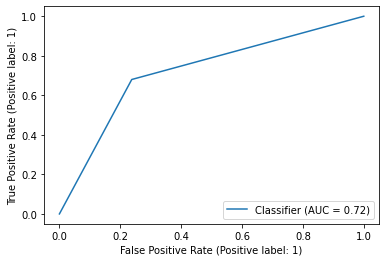

In [58]:
# First, a ROC curve.

RocCurveDisplay.from_predictions(y_test, y_preds)

As you can see, the AUC score is (used to be) 0.72.

In [59]:
# Confusion Matrix

print(confusion_matrix(y_test, y_preds))

[[741 231]
 [ 16  34]]


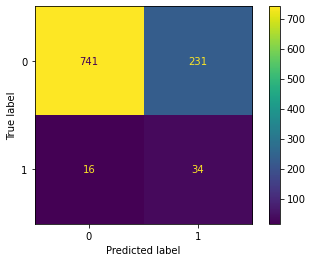

In [60]:
# Using ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

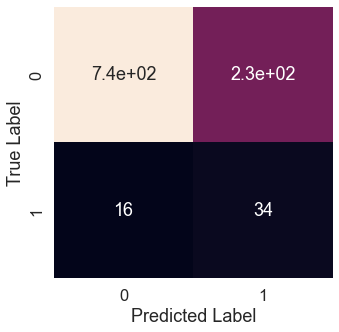

In [61]:
# There's actually a ConfusionMatrixDisplay that does this easier, but I'll do it the manual way below just for posterity.

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a confusion matrix using Seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
    #bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

Many false positives. However, the false negative rate is much lower than it'd ought to be without resampling, which is important when you're trying to make a prediction on if a person has or will have a stroke. Better to be worried than dead.

Let's get a classification report, as well as cross-validated precision, recall, and f1_score.

In [62]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.76      0.86       972
           1       0.13      0.68      0.22        50

    accuracy                           0.76      1022
   macro avg       0.55      0.72      0.54      1022
weighted avg       0.94      0.76      0.83      1022



### Calculate Metrics using Cross-Validation

Calculate accuracy, precision, recall, and f1-score of our model via cross-validation. Will use `cross_val_score`.

In [79]:

 
model = Pipeline([
                        ('imputer', transformer_imp),
                        ('sampler', smote_nc),
                        ('encoder', transformer_enc),
                        ('scaler', StandardScaler(with_mean=False)),
                        ('model', LogisticRegression())
                    ])

In [80]:
# Cross-Validated Accuracy

cv_acc = cross_val_score(model, X, y, cv=5, scoring="accuracy")

np.mean(cv_acc, where=~np.isnan(cv_acc))

C:\Users\DarkH\OneDrive\Desktop\Learning Programming OuO\Machine Learning Course\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DarkH\OneDrive\Desktop\Learning Programming OuO\Machine Learning Course\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for

0.7517123287671234

In [81]:
# Cross-Validated Precision

cv_precision = cross_val_score(model, X, y, cv=5, scoring="precision")

np.mean(cv_precision, where=~np.isnan(cv_precision))

C:\Users\DarkH\OneDrive\Desktop\Learning Programming OuO\Machine Learning Course\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DarkH\OneDrive\Desktop\Learning Programming OuO\Machine Learning Course\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for

0.1191074746108489

In [82]:
# Cross-Validated Recall

cv_recall = cross_val_score(model, X, y, cv=5, scoring="recall")

np.mean(cv_recall, where=~np.isnan(cv_recall))

C:\Users\DarkH\OneDrive\Desktop\Learning Programming OuO\Machine Learning Course\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DarkH\OneDrive\Desktop\Learning Programming OuO\Machine Learning Course\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for

0.6379591836734695

In [83]:
# Cross-Validated F1-Score

cv_f1_score = cross_val_score(model, X, y, cv=5, scoring='f1')

np.mean(cv_f1_score, where=~np.isnan(cv_f1_score))

C:\Users\DarkH\OneDrive\Desktop\Learning Programming OuO\Machine Learning Course\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DarkH\OneDrive\Desktop\Learning Programming OuO\Machine Learning Course\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for

0.2005649626163798

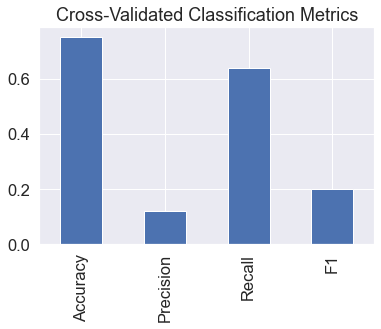

In [84]:
# Visaulize cross-validated metrics

cv_metrics = pd.DataFrame({
    'Accuracy' : np.mean(cv_acc, where=~np.isnan(cv_acc)),
    'Precision' : np.mean(cv_precision, where=~np.isnan(cv_precision)),
    'Recall' : np.mean(cv_recall, where=~np.isnan(cv_recall)),
    'F1' : np.mean(cv_f1_score, where=~np.isnan(cv_f1_score))
},
    index=[0])

cv_metrics.T.plot.bar(title='Cross-Validated Classification Metrics', legend=False);

## Feature Importance

Feature Importance is asking: "Which feature contributed most to the outcome of the model?"

Also: "How did they contribute?"

Finding Feature Importance is different for each ML model.

In [85]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [86]:
# For LogisticRegression, there's the coef_ attribute. For the pipeline overall, it's model.steps[4][1].coef_

model.fit(X_train, y_train)

C:\Users\DarkH\OneDrive\Desktop\Learning Programming OuO\Machine Learning Course\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_imputer',
                                                  SimpleImputer(),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi'])])),
                ('sampler',
                 SMOTENC(categorical_features=[3, 4, 5, 6, 7, 8, 9],
                         random_state=42)),
                ('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_encoder',
                                                  OneHotEncoder(),
                                                  [3, 4, 5, 6, 7, 8, 9])])),
                ('scaler', StandardScaler(with_mean=False)),
                ('model', LogisticRegression())])

In [87]:
model.named_steps['model'].coef_

array([[ 0.02194191, -0.05300324, -0.35717502,  0.07394458, -0.13856494,
         0.07932246, -0.16265795, -0.25982175,  0.20998238, -0.30060409,
        -0.11912446,  0.26517404, -0.18408594,  0.05306193, -0.12308339,
         0.08395841, -0.18654791,  0.02363155,  0.01170654,  0.12156478,
         2.11801458,  0.36471346, -0.00438399]])

Since this has gone through multiple layers of Preprocessing, it's hard to tell which feature is which.

Let's try the manual, guestimation way. Kind of sloppy, but it's massive headache to work it out.

In [92]:
model.named_steps['encoder'].transformers_[0][1].categories_

[array(['Female', 'Male', 'Other'], dtype=object),
 array(['False', 'True'], dtype=object),
 array(['False', 'True'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children'],
       dtype=object),
 array(['Rural', 'Urban'], dtype=object),
 array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object)]

In [97]:
columns = [
    'female', 'male', 'other', 'hypertension -> no', 'hypertension -> yes',
    'heart-disease -> no', 'heart-disease -> yes', 'married -> no', 'married -> yes',
    'govt_job', 'never_worked', 'private', 'self-employed', 'children', 'rural', 'urban', 'unknown', 'formerly smoked', 'never smoked', 'smokes',
    'age', 'avg_glucose', 'bmi'
]

In [98]:
feature_dict = dict(zip(columns, list(model.named_steps['model'].coef_[0])))
feature_dict

{'female': 0.02194190561175717,
 'male': -0.053003236338497677,
 'other': -0.35717502134736795,
 'hypertension -> no': 0.07394458378055783,
 'hypertension -> yes': -0.1385649435353509,
 'heart-disease -> no': 0.07932245677709986,
 'heart-disease -> yes': -0.16265794566047775,
 'married -> no': -0.2598217456327811,
 'married -> yes': 0.2099823790915915,
 'govt_job': -0.30060408763439145,
 'never_worked': -0.11912445792718697,
 'private': 0.2651740363738567,
 'self-employed': -0.18408594370066636,
 'children': 0.05306192910460023,
 'rural': -0.12308338768268372,
 'urban': 0.08395841005373805,
 'unknown': -0.18654791129545148,
 'formerly smoked': 0.02363155183721801,
 'never smoked': 0.011706539070970388,
 'smokes': 0.12156477670606246,
 'age': 2.118014582050572,
 'avg_glucose': 0.36471345723491044,
 'bmi': -0.004383994216074536}

In [103]:
# Let me get rid of the encoding by taking the averages of each.

coefs_encoded = model.named_steps['model'].coef_[0]

coefs_unencoded = []

coefs_unencoded.append(np.mean(coefs_encoded[0:3])) # Gender
coefs_unencoded.append(np.mean(coefs_encoded[3:5])) # Hypertension
coefs_unencoded.append(np.mean(coefs_encoded[5:7])) # Heart-disease
coefs_unencoded.append(np.mean(coefs_encoded[7:9])) # Married
coefs_unencoded.append(np.mean(coefs_encoded[9:14])) # Employment
coefs_unencoded.append(np.mean(coefs_encoded[14:16])) # Living
coefs_unencoded.append(np.mean(coefs_encoded[16:20])) # Smoking
coefs_unencoded = np.concatenate((coefs_unencoded, coefs_encoded[20:23])) # Age, avg_glucose, bmi

coefs_unencoded

array([-0.12941212, -0.03231018, -0.04166774, -0.02491968, -0.0571157 ,
       -0.01956249, -0.00741126,  2.11801458,  0.36471346, -0.00438399])

In [105]:
updated_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age', 'avg_glucose_level', 'bmi']

un_feature_dict = dict(zip(updated_columns, coefs_unencoded))
un_feature_dict

{'gender': -0.12941211735803615,
 'hypertension': -0.03231017987739653,
 'heart_disease': -0.04166774444168895,
 'ever_married': -0.024919683270594795,
 'work_type': -0.05711570475675757,
 'Residence_type': -0.019562488814472832,
 'smoking_status': -0.007411260920300155,
 'age': 2.118014582050572,
 'avg_glucose_level': 0.36471345723491044,
 'bmi': -0.004383994216074536}

In [106]:
# Let's visualize these different feature importances

feature_df = pd.DataFrame(feature_dict, index=[0])
un_feature_df = pd.DataFrame(un_feature_dict, index=[0])

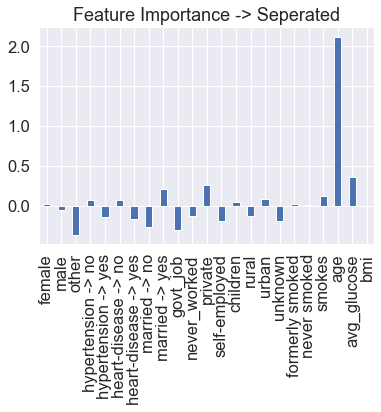

In [107]:
feature_df.T.plot.bar(title="Feature Importance -> Seperated", legend=False);

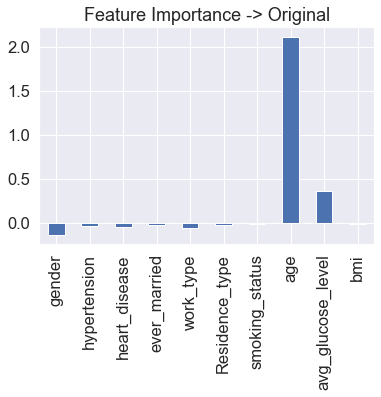

In [108]:
un_feature_df.T.plot.bar(title="Feature Importance -> Original", legend=False);

The above numbers is how the model itself views each feature and its contribution to the possibility of a stroke.

In [109]:
pd.crosstab(df['gender'], df['stroke'])

stroke,0,1
gender,,
Female,2853,141
Male,2007,108
Other,1,0


Males are considered (in the model's eyes) to be more likely to have no stroke. Females are the opposite. That's why there's a positive correlation for females, and a negative one for males.

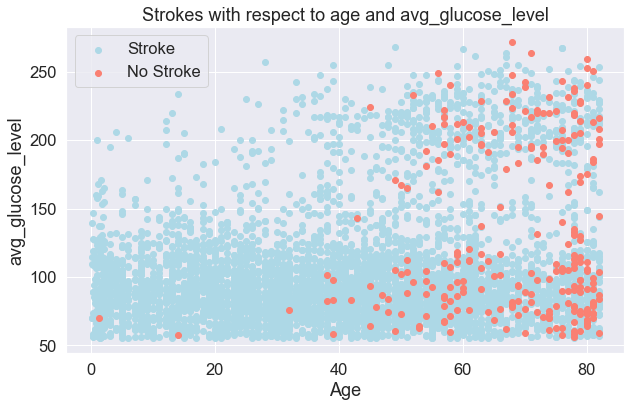

In [111]:
# Combined graphs

plt.figure(figsize=(10,6))

# Scatter with Positive Examples



plt.scatter(df.age[df.stroke==0],
            df.avg_glucose_level[df.stroke==0],
            c='lightblue');

plt.scatter(df.age[df.stroke==1],
            df.avg_glucose_level[df.stroke==1],
            c='salmon');

# Add some helpful info.

plt.title("Strokes with respect to age and avg_glucose_level")
plt.xlabel('Age')
plt.ylabel('avg_glucose_level')
plt.legend(['Stroke', 'No Stroke']);

The model correctly predicts that age has a huge postive correlation with strokes. Also, avg_glucose_level has something to do with it as well.

## Next Steps

Evaluation metric still needs to be met, or reworked.

* Could you collect more data?
* Could try talking to a doctor (or other subject matter expert)?
* Could you improve the data?
    * Better preprocessing
    * Engineering
* Could you try a better model?
    * Like CatBoost or XGBoost?
* Further hyperparameter tuning?

The final step: exporting the model. Only should be done after hitting the evaluation metric.


In [112]:
from joblib import dump

dump(model, 'modelpipe.joblib')

['modelpipe.joblib']